# Solar Energy Prediction 
- Our aim is to predict the "Poly power" which is a indicator of solar energy output. 
- Our data contains 16 different variables collected from 12 sites over the span of 14 months. 
- Apply EDA, feature engineering, and feature selection to predict the power output.


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [3]:
df = pd.read_csv('data/Pasion et al dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

In [5]:
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [6]:
df.isnull().sum()

Location         0
Date             0
Time             0
Latitude         0
Longitude        0
Altitude         0
YRMODAHRMI       0
Month            0
Hour             0
Season           0
Humidity         0
AmbientTemp      0
PolyPwr          0
Wind.Speed       0
Visibility       0
Pressure         0
Cloud.Ceiling    0
dtype: int64

##### No missing values in the data 

In [7]:
df.duplicated().sum()

0

#### No duplicate records found 

In [8]:
df.describe()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,2.017720e+07,1267.483725,38.213823,-108.593678,798.843668,2.017718e+11,6.565883,12.627845,37.121941,29.285117,12.978583,10.318318,9.700071,925.944747,515.966785
std,4.579585e+03,167.602767,6.323761,16.364130,770.681794,4.579846e+07,2.983958,1.672952,23.823011,12.366820,7.123255,6.385030,1.351949,85.215659,301.903379
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.017050e+11,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017111e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,17.529300,21.915280,6.404570,6.000000,10.000000,845.500000,140.000000
50%,2.018032e+07,1300.000000,38.950000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,33.123780,30.289150,13.798700,9.000000,10.000000,961.100000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,52.593990,37.474670,18.863650,14.000000,10.000000,1008.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,65.738370,34.285020,49.000000,10.000000,1029.500000,722.000000


In [9]:
import seaborn as sns

In [10]:
df.corr(numeric_only=True)

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
Date,1.000000,0.012083,0.199342,-0.044425,-0.066245,0.999998,-0.590628,0.009139,0.113511,-0.086950,0.019585,0.033170,-0.027652,0.064530,-0.041170
Time,0.012083,1.000000,0.059200,0.012944,0.042469,0.012107,-0.014654,0.997480,-0.193018,0.158975,0.080991,0.140824,0.012840,-0.049732,-0.025734
Latitude,0.199342,0.059200,1.000000,0.139986,0.297815,0.199295,0.029025,0.052146,-0.122635,-0.227330,-0.253049,-0.147172,-0.068808,-0.306348,-0.076072
Longitude,-0.044425,0.012944,0.139986,1.000000,0.105826,-0.044448,0.074910,0.004862,0.019834,0.068384,0.012446,-0.063132,-0.019893,-0.090606,-0.185584
Altitude,-0.066245,0.042469,0.297815,0.105826,1.000000,-0.066246,0.020087,0.037071,-0.428903,0.099108,-0.077585,-0.009769,0.024248,-0.997164,0.003516
YRMODAHRMI,0.999998,0.012107,0.199295,-0.044448,-0.066246,1.000000,-0.590559,0.009163,0.113514,-0.086948,0.019592,0.033183,-0.027730,0.064537,-0.041172
Month,-0.590628,-0.014654,0.029025,0.074910,0.020087,-0.590559,1.000000,-0.010423,-0.127632,0.213217,-0.024981,-0.084922,0.063204,-0.019603,0.091687
Hour,0.009139,0.997480,0.052146,0.004862,0.037071,0.009163,-0.010423,1.000000,-0.209345,0.169163,0.094935,0.137463,0.026201,-0.044172,-0.004694
Humidity,0.113511,-0.193018,-0.122635,0.019834,-0.428903,0.113514,-0.127632,-0.209345,1.000000,-0.571742,-0.397819,0.059444,-0.274019,0.430945,-0.475787
AmbientTemp,-0.086950,0.158975,-0.227330,0.068384,0.099108,-0.086948,0.213217,0.169163,-0.571742,1.000000,0.580395,-0.098761,0.233031,-0.097168,0.331845


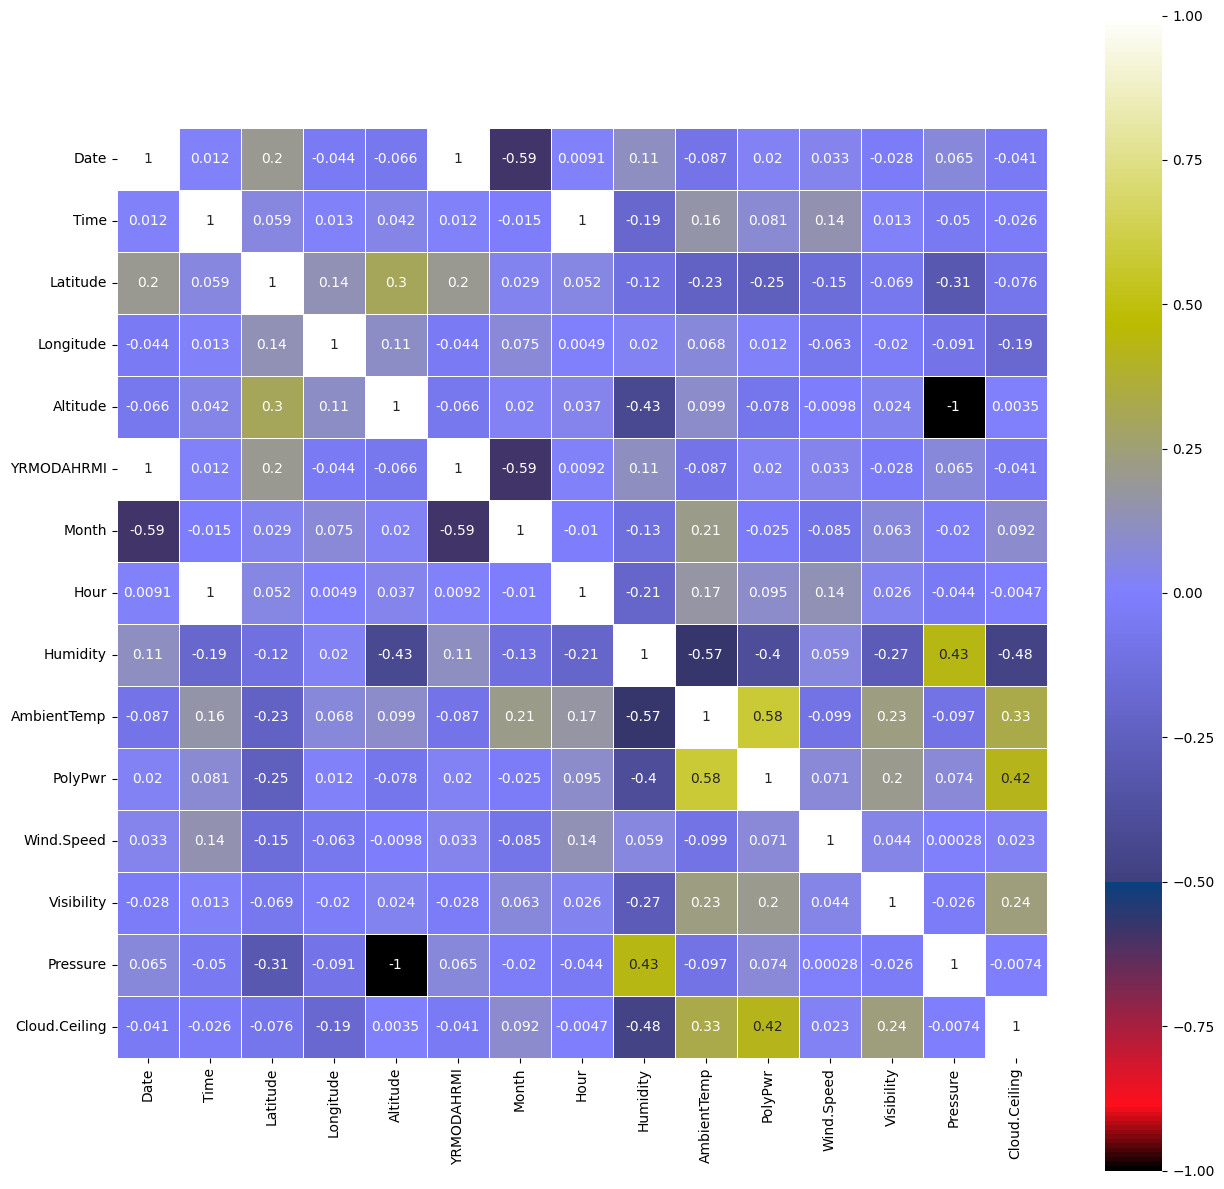

In [11]:
# Heat map 
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1,cmap= 'gist_stern',annot=True,linewidth=0.5,square=True)
plt.show()

##### Observations 
- There are defenitely few features that are very much correlated with our output feature, like cloud ceiling, humidity, visibility 
- We'll try to build a model first using these much features only to just to get an idea about performance of the model
- Then there are features like season and location, which is in object form so we'll try to convert them into numerical features using encoding 


In [12]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [13]:
numerical_cols = df.columns[df.dtypes != "object"]
categorical_cols = df.columns[df.dtypes == 'object']

print('numerical columns: ',numerical_cols)
print('categorical columns: ',categorical_cols)



numerical columns:  Index(['Date', 'Time', 'Latitude', 'Longitude', 'Altitude', 'YRMODAHRMI',
       'Month', 'Hour', 'Humidity', 'AmbientTemp', 'PolyPwr', 'Wind.Speed',
       'Visibility', 'Pressure', 'Cloud.Ceiling'],
      dtype='object')
categorical columns:  Index(['Location', 'Season'], dtype='object')


<Axes: xlabel='Humidity', ylabel='Count'>

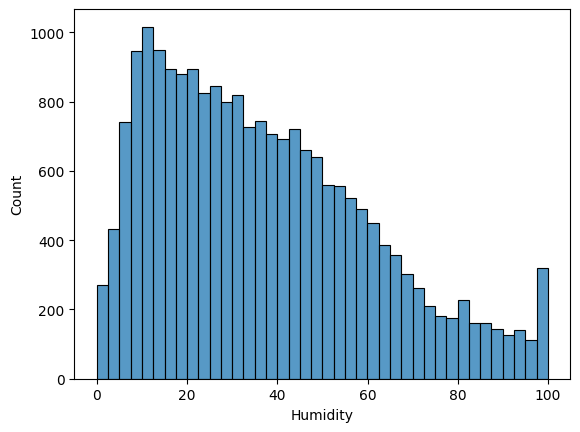

In [14]:
sns.histplot(data=df['Humidity'])

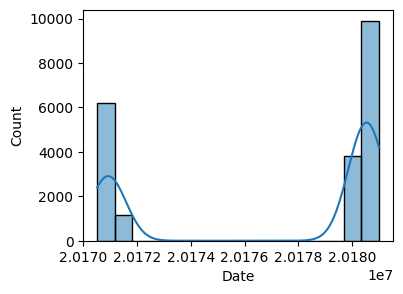

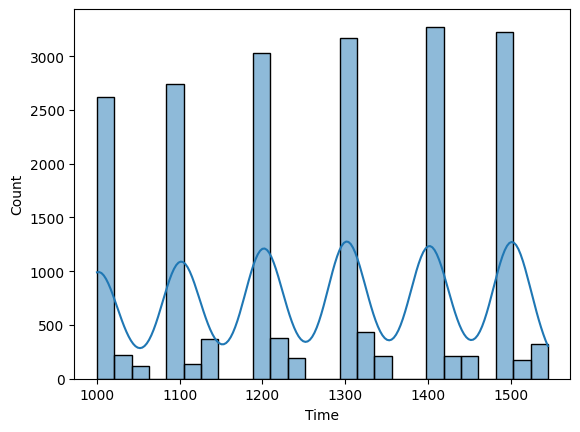

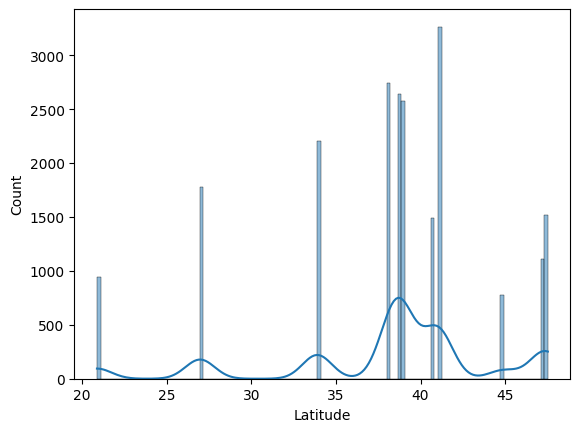

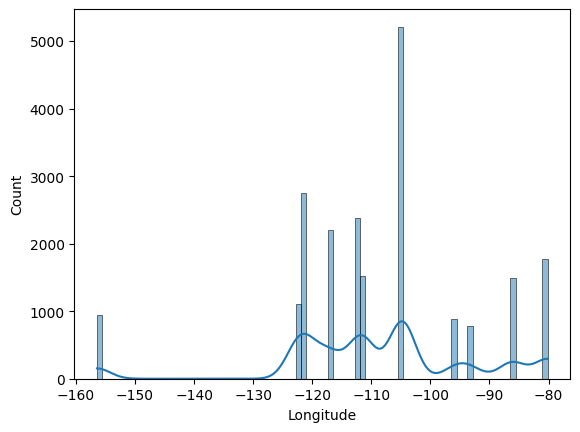

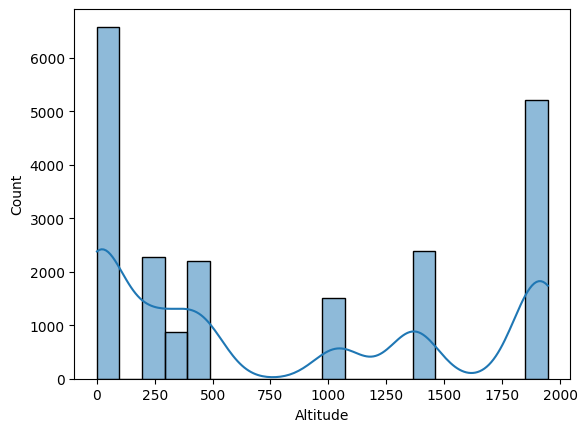

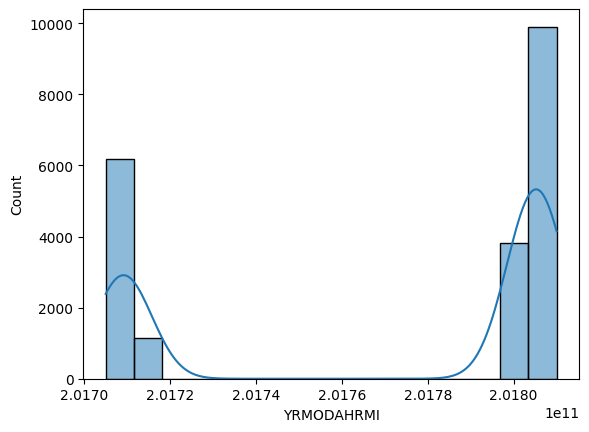

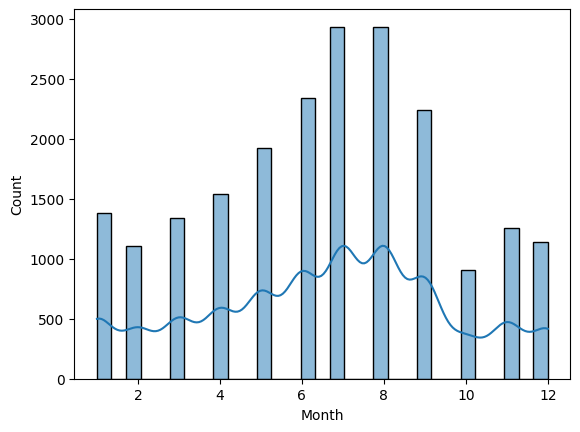

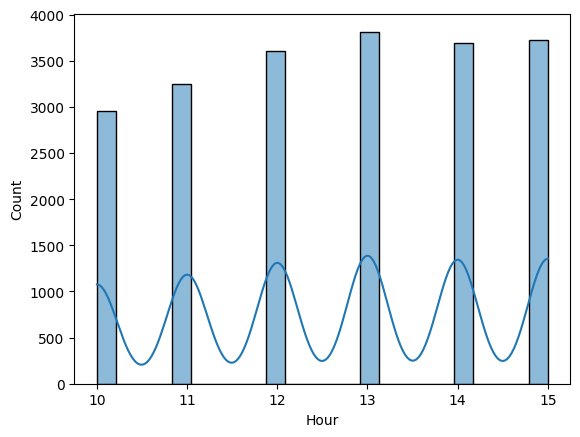

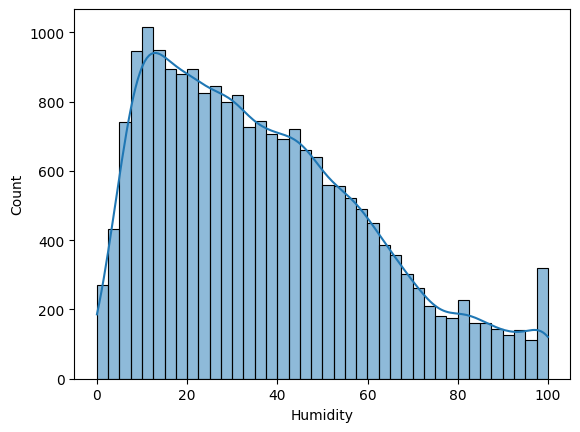

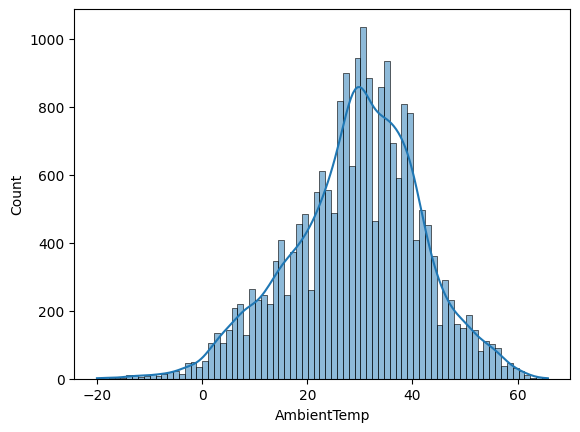

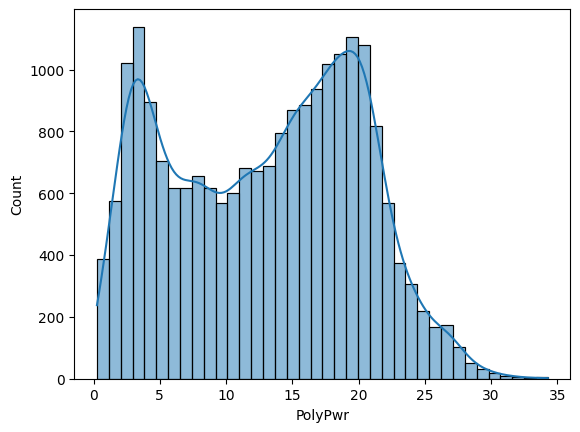

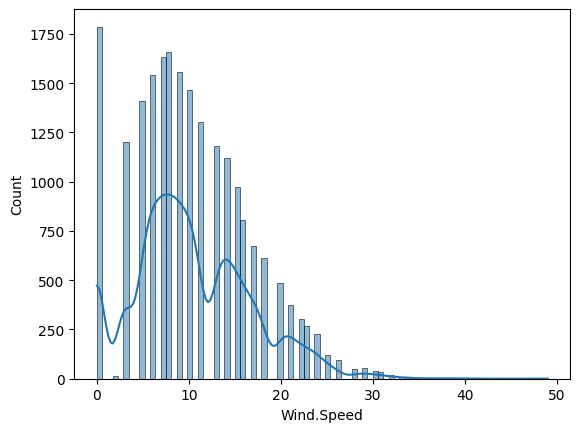

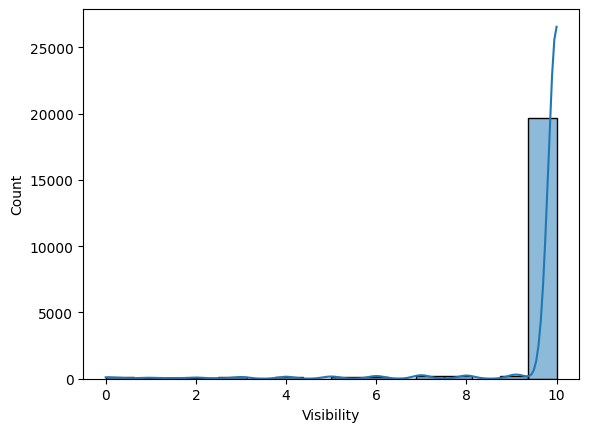

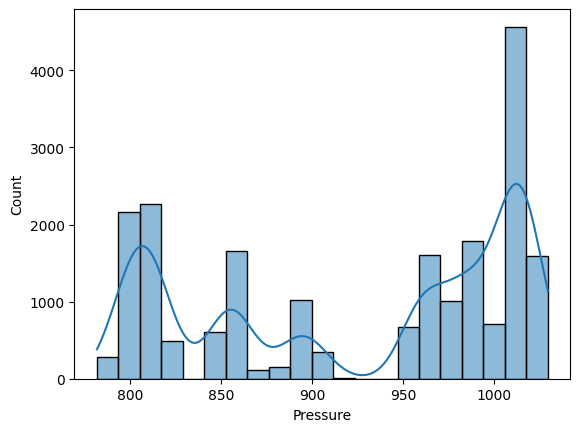

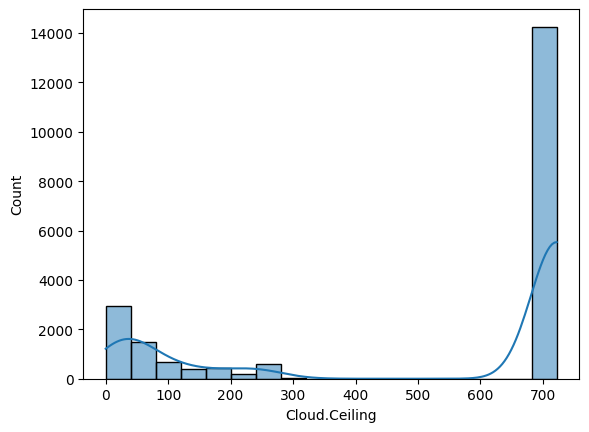

In [15]:
a = list(numerical_cols)
plt.figure(figsize=(4,3))
for i in range(len(a)):
    sns.histplot(data=df[a[i]], kde=True)
    print('\n')
    plt.show()

In [16]:
season_power = df.groupby('Season')['PolyPwr'].mean()


In [17]:
season_power_sorted = season_power.sort_values(ascending=True)

In [18]:
season_power_sorted.keys()

Index(['Winter', 'Fall', 'Spring', 'Summer'], dtype='object', name='Season')

In [19]:
season_power_sorted

Season
Winter     8.263660
Fall      11.167499
Spring    14.192405
Summer    15.320546
Name: PolyPwr, dtype: float64

<Axes: xlabel='Season', ylabel='PolyPwr'>

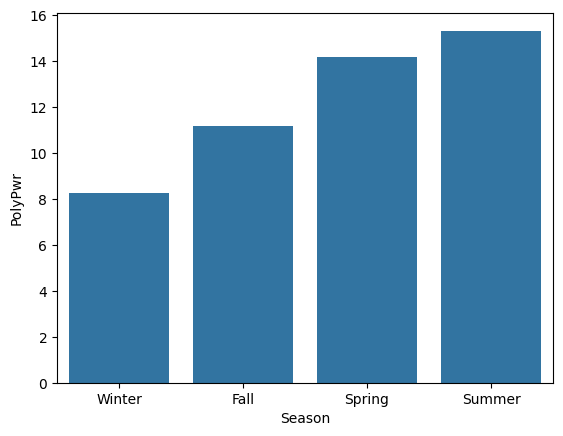

In [20]:
sns.barplot(data=season_power_sorted)

### Conclusion from season data:
- There is good relation between season and power output. 
- We'll convert this data into numerical and give order like this. 
- 4-Summer, 3-Spring, 2-fall, 1-winter


In [21]:
# Polypowr with Location 
location_results = df.groupby('Location')['PolyPwr'].mean()
location_results_sorted = location_results.sort_values(ascending=True)

In [22]:
location_results_sorted.keys()

Index(['Grissom', 'Malmstrom', 'MNANG', 'Camp Murray', 'Peterson', 'USAFA',
       'Travis', 'March AFB', 'Offutt', 'Hill Weber', 'Kahului', 'JDMT'],
      dtype='object', name='Location')

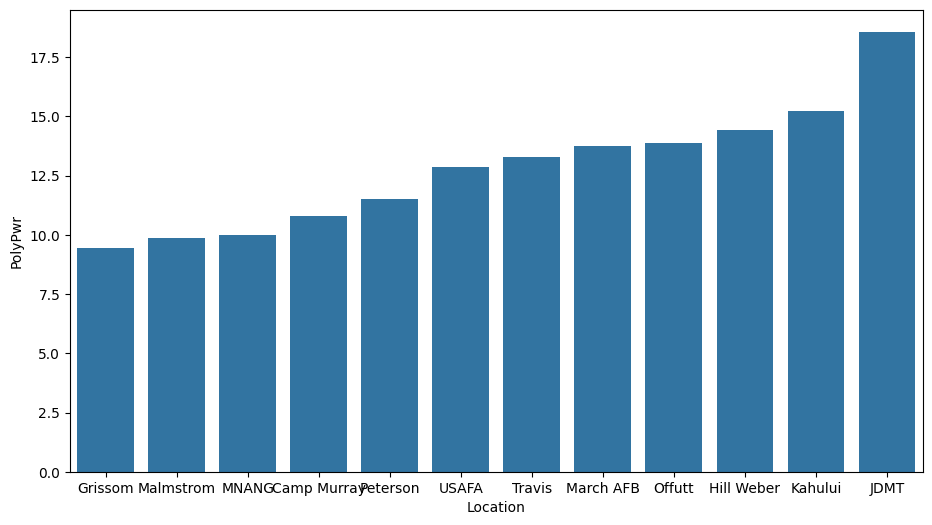

In [23]:
plt.figure(figsize=(11,6))
sns.barplot(data=location_results_sorted)
plt.show()


### Location result 
- Power output is also varied along with location. ( that is obvious 😅)
- We'll order the locations and will use into the model 

### Encoding these two colums 
- lets first encode these two columns and then we'll decide columns to keep and remove

In [24]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
season_power_sorted.keys()

Index(['Winter', 'Fall', 'Spring', 'Summer'], dtype='object', name='Season')

In [26]:
# for season
season_encoder = OrdinalEncoder(categories=[['Winter', 'Fall', 'Spring', 'Summer']])   

In [27]:
season = season_encoder.fit_transform(df[['Season']])

In [28]:
season_df = pd.DataFrame(season, columns=['Season_encoded'])

In [30]:
df

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21040,USAFA,20180928,1530,38.95,-104.83,1947,2.018090e+11,9,15,Fall,11.66992,43.22510,9.79611,14,10.0,802.3,722
21041,USAFA,20180929,1300,38.95,-104.83,1947,2.018090e+11,9,13,Fall,18.22510,28.98247,10.88992,13,10.0,799.2,722
21042,USAFA,20180929,1400,38.95,-104.83,1947,2.018090e+11,9,14,Fall,15.52124,33.49167,8.24479,10,10.0,798.4,722
21043,USAFA,20180929,1500,38.95,-104.83,1947,2.018090e+11,9,15,Fall,6.63452,51.62163,12.47328,10,10.0,797.8,722


In [31]:
season_df.head()

,Season_encoded
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [32]:
df = pd.concat(objs=[df, season_df], axis= 1)

In [34]:
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Season_encoded
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722,0.0
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23,0.0
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32,0.0
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6,0.0
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9,0.0


In [35]:
df.drop(columns=['Season'], axis=1, inplace=True)

In [ ]:
df.drop(columns=['Location_encoded'], axis = 1, inplace= True)

In [ ]:
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Season_encoded
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722,0.0
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23,0.0
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32,0.0
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6,0.0
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9,0.0


Season_encoded
3.0    8208
2.0    4808
1.0    4407
0.0    3622
Name: count, dtype: int64

In [36]:
location_results_sorted

Location
Grissom         9.426174
Malmstrom       9.886024
MNANG           9.996263
Camp Murray    10.777723
Peterson       11.517351
USAFA          12.845495
Travis         13.296735
March AFB      13.761134
Offutt         13.895667
Hill Weber     14.437151
Kahului        15.222645
JDMT           18.574124
Name: PolyPwr, dtype: float64

In [37]:
location_results_sorted.keys()

Index(['Grissom', 'Malmstrom', 'MNANG', 'Camp Murray', 'Peterson', 'USAFA',
       'Travis', 'March AFB', 'Offutt', 'Hill Weber', 'Kahului', 'JDMT'],
      dtype='object', name='Location')

In [38]:
# Location Encoder 
location_encoder = OrdinalEncoder(categories=[['Grissom', 'Malmstrom', 'MNANG', 'Camp Murray', 'Peterson', 'USAFA',
       'Travis', 'March AFB', 'Offutt', 'Hill Weber', 'Kahului', 'JDMT']]) 

In [39]:
location = location_encoder.fit_transform(df[['Location']])

In [40]:
location_df = pd.DataFrame(location, columns=['Location_encoded'])

In [41]:
location_df.value_counts()

Location_encoded
6.0                 2746
4.0                 2640
5.0                 2573
9.0                 2384
7.0                 2204
11.0                1779
1.0                 1517
0.0                 1487
3.0                 1113
10.0                 941
8.0                  881
2.0                  780
Name: count, dtype: int64

In [42]:
df = pd.concat([df, location_df], axis = 1)

In [43]:
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Season_encoded,Location_encoded
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,81.71997,12.86919,2.42769,5,10.0,1010.6,722,0.0,3.0
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,96.64917,9.66415,2.46273,0,10.0,1011.3,23,0.0,3.0
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,93.61572,15.44983,4.46836,5,10.0,1011.6,32,0.0,3.0
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,77.21558,10.36659,1.65364,5,2.0,1024.4,6,0.0,3.0
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,54.80347,16.85471,6.57939,3,3.0,1023.7,9,0.0,3.0


In [44]:
df.drop(columns=['Location'], axis=1, inplace=True)

In [45]:
df.head()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Season_encoded,Location_encoded
0,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,81.71997,12.86919,2.42769,5,10.0,1010.6,722,0.0,3.0
1,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,96.64917,9.66415,2.46273,0,10.0,1011.3,23,0.0,3.0
2,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,93.61572,15.44983,4.46836,5,10.0,1011.6,32,0.0,3.0
3,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,77.21558,10.36659,1.65364,5,2.0,1024.4,6,0.0,3.0
4,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,54.80347,16.85471,6.57939,3,3.0,1023.7,9,0.0,3.0


### We have encoded the Location and Season columns now lets check again coorelation betw colums 

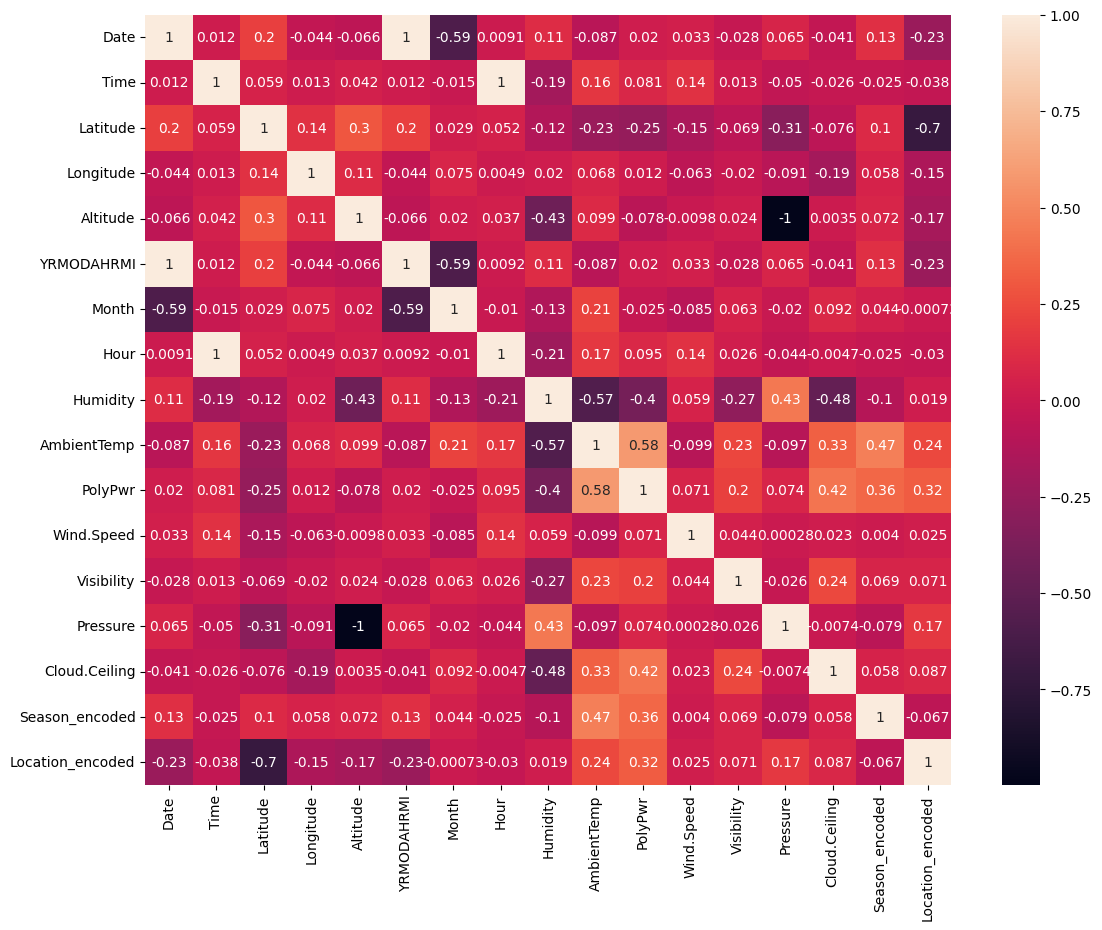

In [46]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [55]:
## Function to remove low correlated data 


def filter_low_correlation(data, target_feature, threshold=0.2):
    """
    Filter out low-correlated features with the target feature based on a specified correlation threshold.

    Parameters:
    - data: DataFrame, the input data containing features.
    - target_feature: str, the name of the target feature (dependent variable).
    - threshold: float, the correlation threshold below which features will be filtered.

    Returns:
    - filtered_data: DataFrame, the data with low-correlated features removed.
    """
    # Calculate correlation with the target feature
    correlation_with_target = data.corr()[target_feature].abs()

    # Identify low-correlated features
    low_correlation_features = correlation_with_target < threshold

    # Remove low-correlated features
    filtered_data = data.drop(columns=data.columns[low_correlation_features])

    return filtered_data




In [56]:
filtered_data = filter_low_correlation(df, threshold=0.19, target_feature='PolyPwr')

In [57]:
filtered_data.head()

,Latitude,Humidity,AmbientTemp,PolyPwr,Visibility,Cloud.Ceiling,Season_encoded,Location_encoded
0,47.11,81.71997,12.86919,2.42769,10.0,722,0.0,3.0
1,47.11,96.64917,9.66415,2.46273,10.0,23,0.0,3.0
2,47.11,93.61572,15.44983,4.46836,10.0,32,0.0,3.0
3,47.11,77.21558,10.36659,1.65364,2.0,6,0.0,3.0
4,47.11,54.80347,16.85471,6.57939,3.0,9,0.0,3.0


In [59]:
from sklearn.model_selection import train_test_split

In [61]:
y = filtered_data[['PolyPwr']]
X = filtered_data.drop(labels=['PolyPwr'], axis=1)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=3)

In [64]:
X_train.head()

,Latitude,Humidity,AmbientTemp,Visibility,Cloud.Ceiling,Season_encoded,Location_encoded
7900,47.52,62.17651,4.60106,10.0,80,0.0,1.0
4178,41.15,22.98584,32.22023,10.0,722,2.0,9.0
15725,38.82,6.95190,31.63864,10.0,250,1.0,4.0
5258,26.98,82.07397,29.71764,10.0,41,3.0,11.0
4633,41.15,12.76855,49.60243,10.0,722,3.0,9.0


In [65]:
y_train.head()

,PolyPwr
7900,3.02564
4178,20.36269
15725,13.94960
5258,4.85731
4633,20.02154


In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

In [72]:
X_train.columns

Index(['Latitude', 'Humidity', 'AmbientTemp', 'Visibility', 'Cloud.Ceiling',
       'Season_encoded', 'Location_encoded'],
      dtype='object')

In [73]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=['Latitude', 'Humidity', 'AmbientTemp', 'Visibility', 'Cloud.Ceiling',
       'Season_encoded', 'Location_encoded'])

In [75]:
X_train_scaled.head()

,Latitude,Humidity,AmbientTemp,Visibility,Cloud.Ceiling,Season_encoded,Location_encoded
0,1.467572,1.047049,-1.978000,0.226586,-1.451408,-1.650439,-1.473297
1,0.458697,-0.597063,0.241416,0.226586,0.678211,0.138701,1.054144
2,0.089673,-1.269713,0.194681,0.226586,-0.887490,-0.755869,-0.525507
3,-1.785536,1.881780,0.040314,0.226586,-1.580777,1.033271,1.686005
4,0.458697,-1.025695,1.638212,0.226586,0.678211,1.033271,1.054144


In [76]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=['Latitude', 'Humidity', 'AmbientTemp', 'Visibility', 'Cloud.Ceiling',
       'Season_encoded', 'Location_encoded'])

In [77]:
X_test_scaled.head()

,Latitude,Humidity,AmbientTemp,Visibility,Cloud.Ceiling,Season_encoded,Location_encoded
0,1.051035,0.175703,-1.468162,-1.222126,-0.887490,0.138701,-1.157367
1,0.110263,-1.199298,1.283753,0.226586,0.678211,-0.755869,-0.209576
2,-0.014857,-0.556095,0.705329,0.226586,0.678211,-0.755869,0.106354
3,0.110263,-0.981910,0.921606,0.226586,0.678211,1.033271,-0.209576
4,0.110263,-0.589638,0.917559,0.226586,0.678211,1.033271,-0.209576


In [78]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [79]:
# model evaluation function 

def model_evaluation(y_test, y_pred):
    mse = mean_squared_error(y_true=y_test, y_pred= y_pred)
    mae = mean_absolute_error(y_true=y_test, y_pred= y_pred)
    r2 = r2_score(y_true= y_test, y_pred= y_pred)

    return mse, mae, r2

In [80]:
# Train Multiple models 
# Model evaluation 

models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

trained_models_list = []
models_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train)


    # make predictions 
    y_pred = model.predict(X_test_scaled)

    mse, mae, r2 = model_evaluation(y_test, y_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print('MSE', mse)
    print('MAE', mae)
    print('R2 Score', r2*100)

    r2_list.append(r2)

    print('='*35)
    print("\n")

LinearRegression
Model Training Performance
MSE 26.896003985324096
MAE 4.045898333275882
R2 Score 46.3230935309774


Lasso
Model Training Performance
MSE 30.067068208646425
MAE 4.463581759943569
R2 Score 39.99453565987454


Ridge
Model Training Performance
MSE 26.895984907289957
MAE 4.045908955327846
R2 Score 46.323131605401194


DecisionTreeRegressor
Model Training Performance
MSE 38.35741314381136
MAE 4.326932203040862
R2 Score 23.44932433689887




e:\ML_Projects\Solar_energy_prediction_end_to_end\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor
Model Training Performance
MSE 21.564277254785225
MAE 3.3476364941655223
R2 Score 56.963729857090506




e:\ML_Projects\Solar_energy_prediction_end_to_end\venv\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor
Model Training Performance
MSE 20.59809643694932
MAE 3.3805656921798652
R2 Score 58.891956720063924




e:\ML_Projects\Solar_energy_prediction_end_to_end\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR
Model Training Performance
MSE 21.736790492645138
MAE 3.276042530739092
R2 Score 56.6194416521093


KNeighborsRegressor
Model Training Performance
MSE 21.75429071758808
MAE 3.3358813120050685
R2 Score 56.58451609447026




In [81]:
rf = RandomForestRegressor()

In [83]:
rf.fit(X_train, y_train)

e:\ML_Projects\Solar_energy_prediction_end_to_end\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [84]:
y_pred = rf.predict(X_test)

In [85]:
r2_score(y_true=y_test, y_pred=y_pred)

0.5703044383953055

In [89]:
X1 = X.drop(columns=['Latitude', 'Location_encoded'], axis=1)

In [90]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=3)

In [92]:
rf.fit(X1_train, y_train)

e:\ML_Projects\Solar_energy_prediction_end_to_end\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [93]:
y1_pred = rf.predict(X1_test)

In [94]:
r2_score(y_test, y_pred)

0.5703044383953055

In [101]:
gradient_bst = GradientBoostingRegressor()

In [102]:
gradient_bst.fit(X1_train, y_train)

e:\ML_Projects\Solar_energy_prediction_end_to_end\venv\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [103]:
y1_pred = gradient_bst.predict(X1_test)

In [104]:
r2_score(y_true=y_test, y_pred=y1_pred)

0.5448064351037257

In [105]:
gradient_bst.fit(X_train, y_train)

e:\ML_Projects\Solar_energy_prediction_end_to_end\venv\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [106]:
y_pred = gradient_bst.predict(X_test)

In [107]:
r2_score(y_true=y_test, y_pred=y_pred)

0.5889130082804562

In [95]:
X1_train.head()

,Humidity,AmbientTemp,Visibility,Cloud.Ceiling,Season_encoded
7900,62.17651,4.60106,10.0,80,0.0
4178,22.98584,32.22023,10.0,722,2.0
15725,6.95190,31.63864,10.0,250,1.0
5258,82.07397,29.71764,10.0,41,3.0
4633,12.76855,49.60243,10.0,722,3.0


In [96]:
import matplotlib.pyplot as plt

In [97]:
import seaborn as sns 

In [99]:
list(X1_train.columns)

['Humidity', 'AmbientTemp', 'Visibility', 'Cloud.Ceiling', 'Season_encoded']

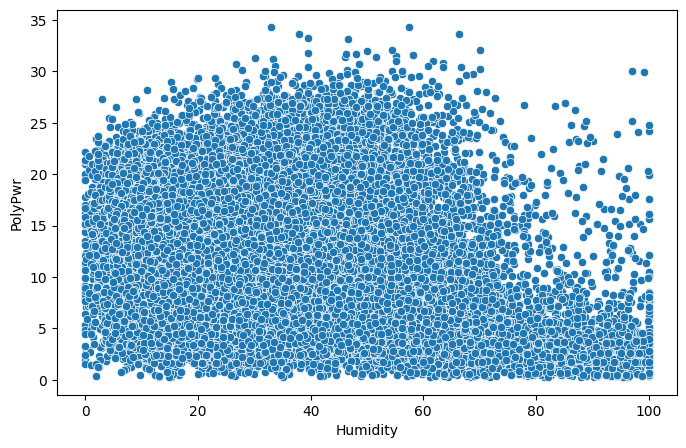

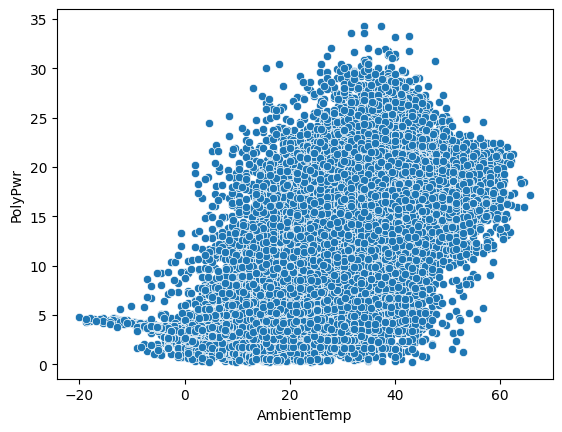

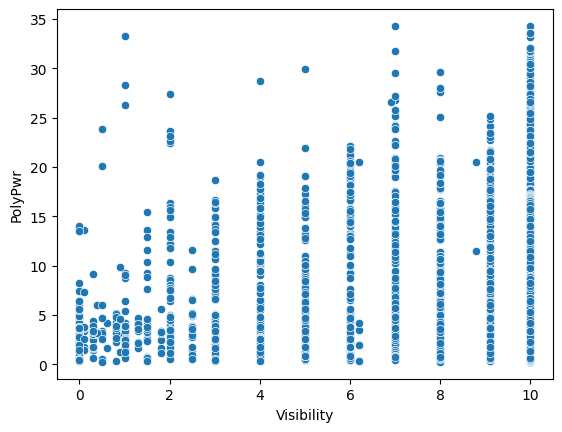

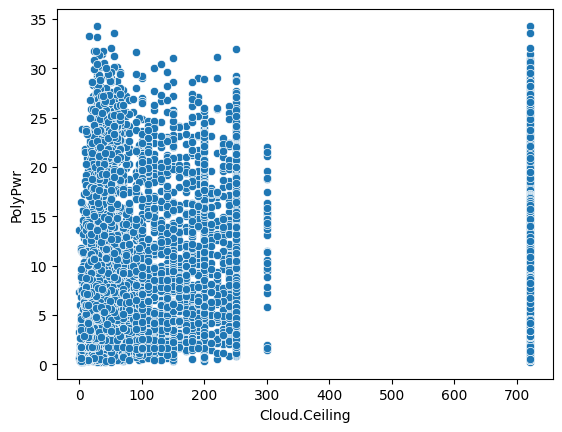

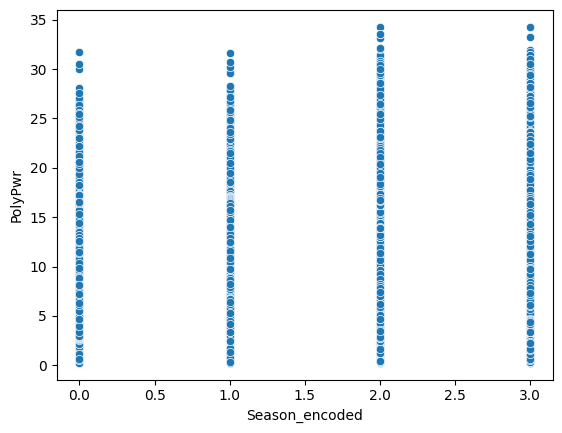

In [100]:
X_axis = list(X1_train.columns)
plt.figure(figsize=(8,5))
for i in range(len(X_axis)):
    sns.scatterplot(x=X1[X_axis[i]], y=y['PolyPwr'])
    plt.show()

In [110]:
df.head()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Season_encoded,Location_encoded
0,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,81.71997,12.86919,2.42769,5,10.0,1010.6,722,0.0,3.0
1,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,96.64917,9.66415,2.46273,0,10.0,1011.3,23,0.0,3.0
2,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,93.61572,15.44983,4.46836,5,10.0,1011.6,32,0.0,3.0
3,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,77.21558,10.36659,1.65364,5,2.0,1024.4,6,0.0,3.0
4,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,54.80347,16.85471,6.57939,3,3.0,1023.7,9,0.0,3.0


In [112]:
list(df.columns)

['Date',
 'Time',
 'Latitude',
 'Longitude',
 'Altitude',
 'YRMODAHRMI',
 'Month',
 'Hour',
 'Humidity',
 'AmbientTemp',
 'PolyPwr',
 'Wind.Speed',
 'Visibility',
 'Pressure',
 'Cloud.Ceiling',
 'Season_encoded',
 'Location_encoded']

In [113]:
corr1 = df.corr()['PolyPwr'].abs()

In [116]:
corr_sorted = corr1.sort_values()

In [117]:
corr_sorted.keys()

Index(['Longitude', 'Date', 'YRMODAHRMI', 'Month', 'Wind.Speed', 'Pressure',
       'Altitude', 'Time', 'Hour', 'Visibility', 'Latitude',
       'Location_encoded', 'Season_encoded', 'Humidity', 'Cloud.Ceiling',
       'AmbientTemp', 'PolyPwr'],
      dtype='object')

#### We are looking at how models performance varies with number of input features for random forest algorithm and XG boosting algorithm as well. 

In [125]:
features_list = ['Longitude', 'Date', 'YRMODAHRMI', 'Month', 'Wind.Speed', 'Pressure',
       'Altitude', 'Time', 'Hour', 'Visibility', 'Latitude',
       'Location_encoded', 'Season_encoded', 'Humidity', 'Cloud.Ceiling']

In [118]:
X = df.drop(labels=['PolyPwr'], axis=1)
y = df['PolyPwr']

In [120]:
X.head(), y.head()

(       Date  Time  Latitude  Longitude  Altitude    YRMODAHRMI  Month  Hour  \
 0  20171203  1145     47.11    -122.57        84  2.017120e+11     12    11   
 1  20171203  1315     47.11    -122.57        84  2.017120e+11     12    13   
 2  20171203  1330     47.11    -122.57        84  2.017120e+11     12    13   
 3  20171204  1230     47.11    -122.57        84  2.017120e+11     12    12   
 4  20171204  1415     47.11    -122.57        84  2.017120e+11     12    14   
 
    Humidity  AmbientTemp  Wind.Speed  Visibility  Pressure  Cloud.Ceiling  \
 0  81.71997     12.86919           5        10.0    1010.6            722   
 1  96.64917      9.66415           0        10.0    1011.3             23   
 2  93.61572     15.44983           5        10.0    1011.6             32   
 3  77.21558     10.36659           5         2.0    1024.4              6   
 4  54.80347     16.85471           3         3.0    1023.7              9   
 
    Season_encoded  Location_encoded  
 0       

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [141]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=[
    'Longitude', 'Date', 'YRMODAHRMI', 'Month', 'Wind.Speed', 'Pressure',
       'Altitude', 'Time', 'Hour', 'Visibility', 'Latitude',
       'Location_encoded', 'Season_encoded', 'Humidity', 'Cloud.Ceiling',
       'AmbientTemp'])

X_test = pd.DataFrame(scaler.transform(X_test), columns=[
    'Longitude', 'Date', 'YRMODAHRMI', 'Month', 'Wind.Speed', 'Pressure',
       'Altitude', 'Time', 'Hour', 'Visibility', 'Latitude',
       'Location_encoded', 'Season_encoded', 'Humidity', 'Cloud.Ceiling',
       'AmbientTemp'])

In [136]:
X_train.head()

,Longitude,Date,YRMODAHRMI,Month,Wind.Speed,Pressure,Altitude,Time,Hour,Visibility,Latitude,Location_encoded,Season_encoded,Humidity,Cloud.Ceiling,AmbientTemp
0,0.630661,1.389904,1.467572,-0.156599,0.313056,0.630969,-1.868144,1.421243,1.047049,-1.978000,-0.212139,0.226586,-0.217633,-1.451408,-1.650439,-1.473297
1,0.716700,-0.999670,0.458697,-0.206316,0.737463,0.718535,-0.522704,-0.973260,-0.597063,0.241416,-0.683083,0.226586,-0.812514,0.678211,0.138701,1.054144
2,0.808650,1.389904,0.089673,0.240523,1.398084,0.806101,0.822736,1.421243,-1.269713,0.194681,0.729748,0.226586,-1.355769,-0.887490,-0.755869,-0.525507
3,-1.427701,-0.730843,-1.785536,1.750448,-1.038037,-1.426837,0.150016,-0.973260,1.881780,0.040314,-0.369121,0.226586,1.087117,-1.580777,1.033271,1.686005
4,0.763550,0.792510,0.458697,-0.206316,0.737463,0.762318,0.150016,0.822618,-1.025695,1.638212,-0.369121,0.226586,-0.828941,0.678211,1.033271,1.054144


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              21045 non-null  int64  
 1   Time              21045 non-null  int64  
 2   Latitude          21045 non-null  float64
 3   Longitude         21045 non-null  float64
 4   Altitude          21045 non-null  int64  
 5   YRMODAHRMI        21045 non-null  float64
 6   Month             21045 non-null  int64  
 7   Hour              21045 non-null  int64  
 8   Humidity          21045 non-null  float64
 9   AmbientTemp       21045 non-null  float64
 10  PolyPwr           21045 non-null  float64
 11  Wind.Speed        21045 non-null  int64  
 12  Visibility        21045 non-null  float64
 13  Pressure          21045 non-null  float64
 14  Cloud.Ceiling     21045 non-null  int64  
 15  Season_encoded    21045 non-null  float64
 16  Location_encoded  21045 non-null  float6

In [139]:
len(list(X_train.columns))

15

In [142]:
for i in range(len(features_list)):

    model = RandomForestRegressor()

    model.fit(X_train, y_train)

    y_pred1 = model.predict(X_test)

    score = r2_score(y_true= y_test, y_pred=y_pred1)
    adjusted_r2 = 1-(((1-score)*(21045-1))/(21045-len(list(X_train.columns))-1))

    print(list(X_train.columns))
    print("R2",score)
    print("Adj R2", adjusted_r2)

    print("=="*35)
    print("\n"*3)

    X_train.drop(labels=[features_list[i]], axis=1, inplace=True)
    X_test.drop(labels=[features_list[i]], axis=1, inplace=True)

['Longitude', 'Date', 'YRMODAHRMI', 'Month', 'Wind.Speed', 'Pressure', 'Altitude', 'Time', 'Hour', 'Visibility', 'Latitude', 'Location_encoded', 'Season_encoded', 'Humidity', 'Cloud.Ceiling', 'AmbientTemp']
R2 0.6817025686606877
Adj R2 0.6814603792512608




['Date', 'YRMODAHRMI', 'Month', 'Wind.Speed', 'Pressure', 'Altitude', 'Time', 'Hour', 'Visibility', 'Latitude', 'Location_encoded', 'Season_encoded', 'Humidity', 'Cloud.Ceiling', 'AmbientTemp']
R2 0.6732235719278015
Adj R2 0.6729904820794452




['YRMODAHRMI', 'Month', 'Wind.Speed', 'Pressure', 'Altitude', 'Time', 'Hour', 'Visibility', 'Latitude', 'Location_encoded', 'Season_encoded', 'Humidity', 'Cloud.Ceiling', 'AmbientTemp']
R2 0.6685314530258173
Adj R2 0.6683107892284974




['Month', 'Wind.Speed', 'Pressure', 'Altitude', 'Time', 'Hour', 'Visibility', 'Latitude', 'Location_encoded', 'Season_encoded', 'Humidity', 'Cloud.Ceiling', 'AmbientTemp']
R2 0.6673786787742715
Adj R2 0.6671730738493542




['Wind.Speed', 'Pressure', 'Altit

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [129]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=[
    'Longitude', 'Date', 'YRMODAHRMI', 'Month', 'Wind.Speed', 'Pressure',
       'Altitude', 'Time', 'Hour', 'Visibility', 'Latitude',
       'Location_encoded', 'Season_encoded', 'Humidity', 'Cloud.Ceiling',
       'AmbientTemp'])

X_test = pd.DataFrame(scaler.transform(X_test), columns=[
    'Longitude', 'Date', 'YRMODAHRMI', 'Month', 'Wind.Speed', 'Pressure',
       'Altitude', 'Time', 'Hour', 'Visibility', 'Latitude',
       'Location_encoded', 'Season_encoded', 'Humidity', 'Cloud.Ceiling',
       'AmbientTemp'])

In [130]:
for i in range(len(features_list)):

    model = GradientBoostingRegressor()

    model.fit(X_train, y_train)

    y_pred1 = model.predict(X_test)

    score = r2_score(y_true= y_test, y_pred=y_pred1)

    print(list(X_train.columns))
    print(score)

    print("=="*35)
    print("\n\n")

    X_train.drop(labels=[features_list[i]], axis=1, inplace=True)
    X_test.drop(labels=[features_list[i]], axis=1, inplace=True)

['Longitude', 'Date', 'YRMODAHRMI', 'Month', 'Wind.Speed', 'Pressure', 'Altitude', 'Time', 'Hour', 'Visibility', 'Latitude', 'Location_encoded', 'Season_encoded', 'Humidity', 'Cloud.Ceiling', 'AmbientTemp']
0.6403291110714622



['Date', 'YRMODAHRMI', 'Month', 'Wind.Speed', 'Pressure', 'Altitude', 'Time', 'Hour', 'Visibility', 'Latitude', 'Location_encoded', 'Season_encoded', 'Humidity', 'Cloud.Ceiling', 'AmbientTemp']
0.6389424229726206



['YRMODAHRMI', 'Month', 'Wind.Speed', 'Pressure', 'Altitude', 'Time', 'Hour', 'Visibility', 'Latitude', 'Location_encoded', 'Season_encoded', 'Humidity', 'Cloud.Ceiling', 'AmbientTemp']
0.6389168082094744



['Month', 'Wind.Speed', 'Pressure', 'Altitude', 'Time', 'Hour', 'Visibility', 'Latitude', 'Location_encoded', 'Season_encoded', 'Humidity', 'Cloud.Ceiling', 'AmbientTemp']
0.6380802510952451



['Wind.Speed', 'Pressure', 'Altitude', 'Time', 'Hour', 'Visibility', 'Latitude', 'Location_encoded', 'Season_encoded', 'Humidity', 'Cloud.Ceiling', 'Ambi